In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
ml_accuracies = dict()

In [3]:
df = pd.read_csv("cancer patient data sets.csv", index_col='index')
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# descartar a coluna 'patient Id'
df.drop("Patient Id", axis=1, inplace=True)

In [5]:
# deixar o nome das colunas tudo em minusculo e o espaço para '_' para melhor manipulação
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

In [6]:
df.head()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                   1000

In [8]:
# observando a coluna que irá ser usada como 'y'/'target' nos modelos de ML
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']


In [9]:
# passando os valores de string para números
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  [0 1 2]


<ipython-input-9-84267ba4972c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["level"].replace(mapping, inplace=True)
<ipython-input-9-84267ba4972c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["level"].replace(mapping, inplace=True)


In [10]:
round(df.describe().iloc[1:, ].T, 3)

,mean,std,min,25%,50%,75%,max
age,37.174,12.005,14.0,27.75,36.0,45.0,73.0
gender,1.402,0.491,1.0,1.00,1.0,2.0,2.0
air_pollution,3.840,2.030,1.0,2.00,3.0,6.0,8.0
alcohol_use,4.563,2.620,1.0,2.00,5.0,7.0,8.0
dust_allergy,5.165,1.981,1.0,4.00,6.0,7.0,8.0
occupational_hazards,4.840,2.108,1.0,3.00,5.0,7.0,8.0
genetic_risk,4.580,2.127,1.0,2.00,5.0,7.0,7.0
chronic_lung_disease,4.380,1.849,1.0,3.00,4.0,6.0,7.0
balanced_diet,4.491,2.136,1.0,2.00,4.0,7.0,7.0
obesity,4.465,2.125,1.0,3.00,4.0,7.0,7.0


In [11]:
# separando o dataframe em features(X) e target(y)
X = df.drop(columns='level')
y = df.level

# observando os primeiros valores de X e y
display(X.head())
print(y[:5])

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


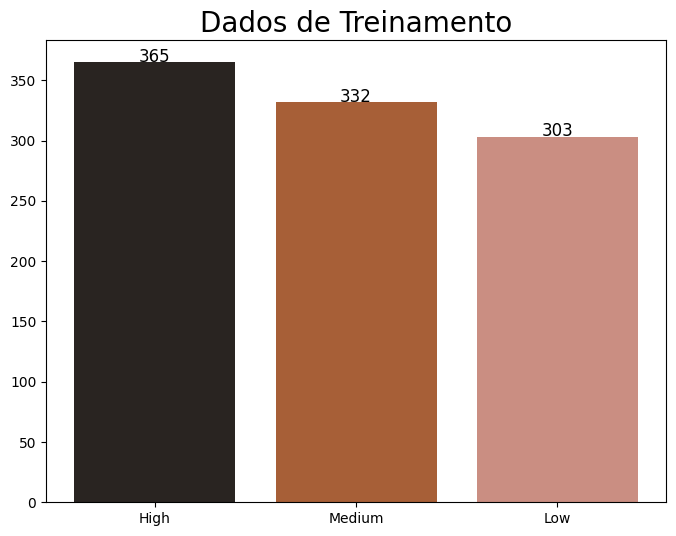

In [12]:
# Visualização dos dados

plt.figure(figsize=(8, 6))
plt.title('Dados de Treinamento', fontsize=20)

# Obtendo os valores e rótulos
counts = df.level.value_counts()
labels = list(mapping.keys())

# Criando o gráfico de barras
plt.bar(labels, counts, color=['#292421','#A75F37', '#CA8E82'])

# Adicionando os rótulos dos valores nas barras
for i, value in enumerate(counts):
    plt.text(i, value + 0.5, f'{value}', ha='center', fontsize=12)

# Exibindo o gráfico
plt.show()

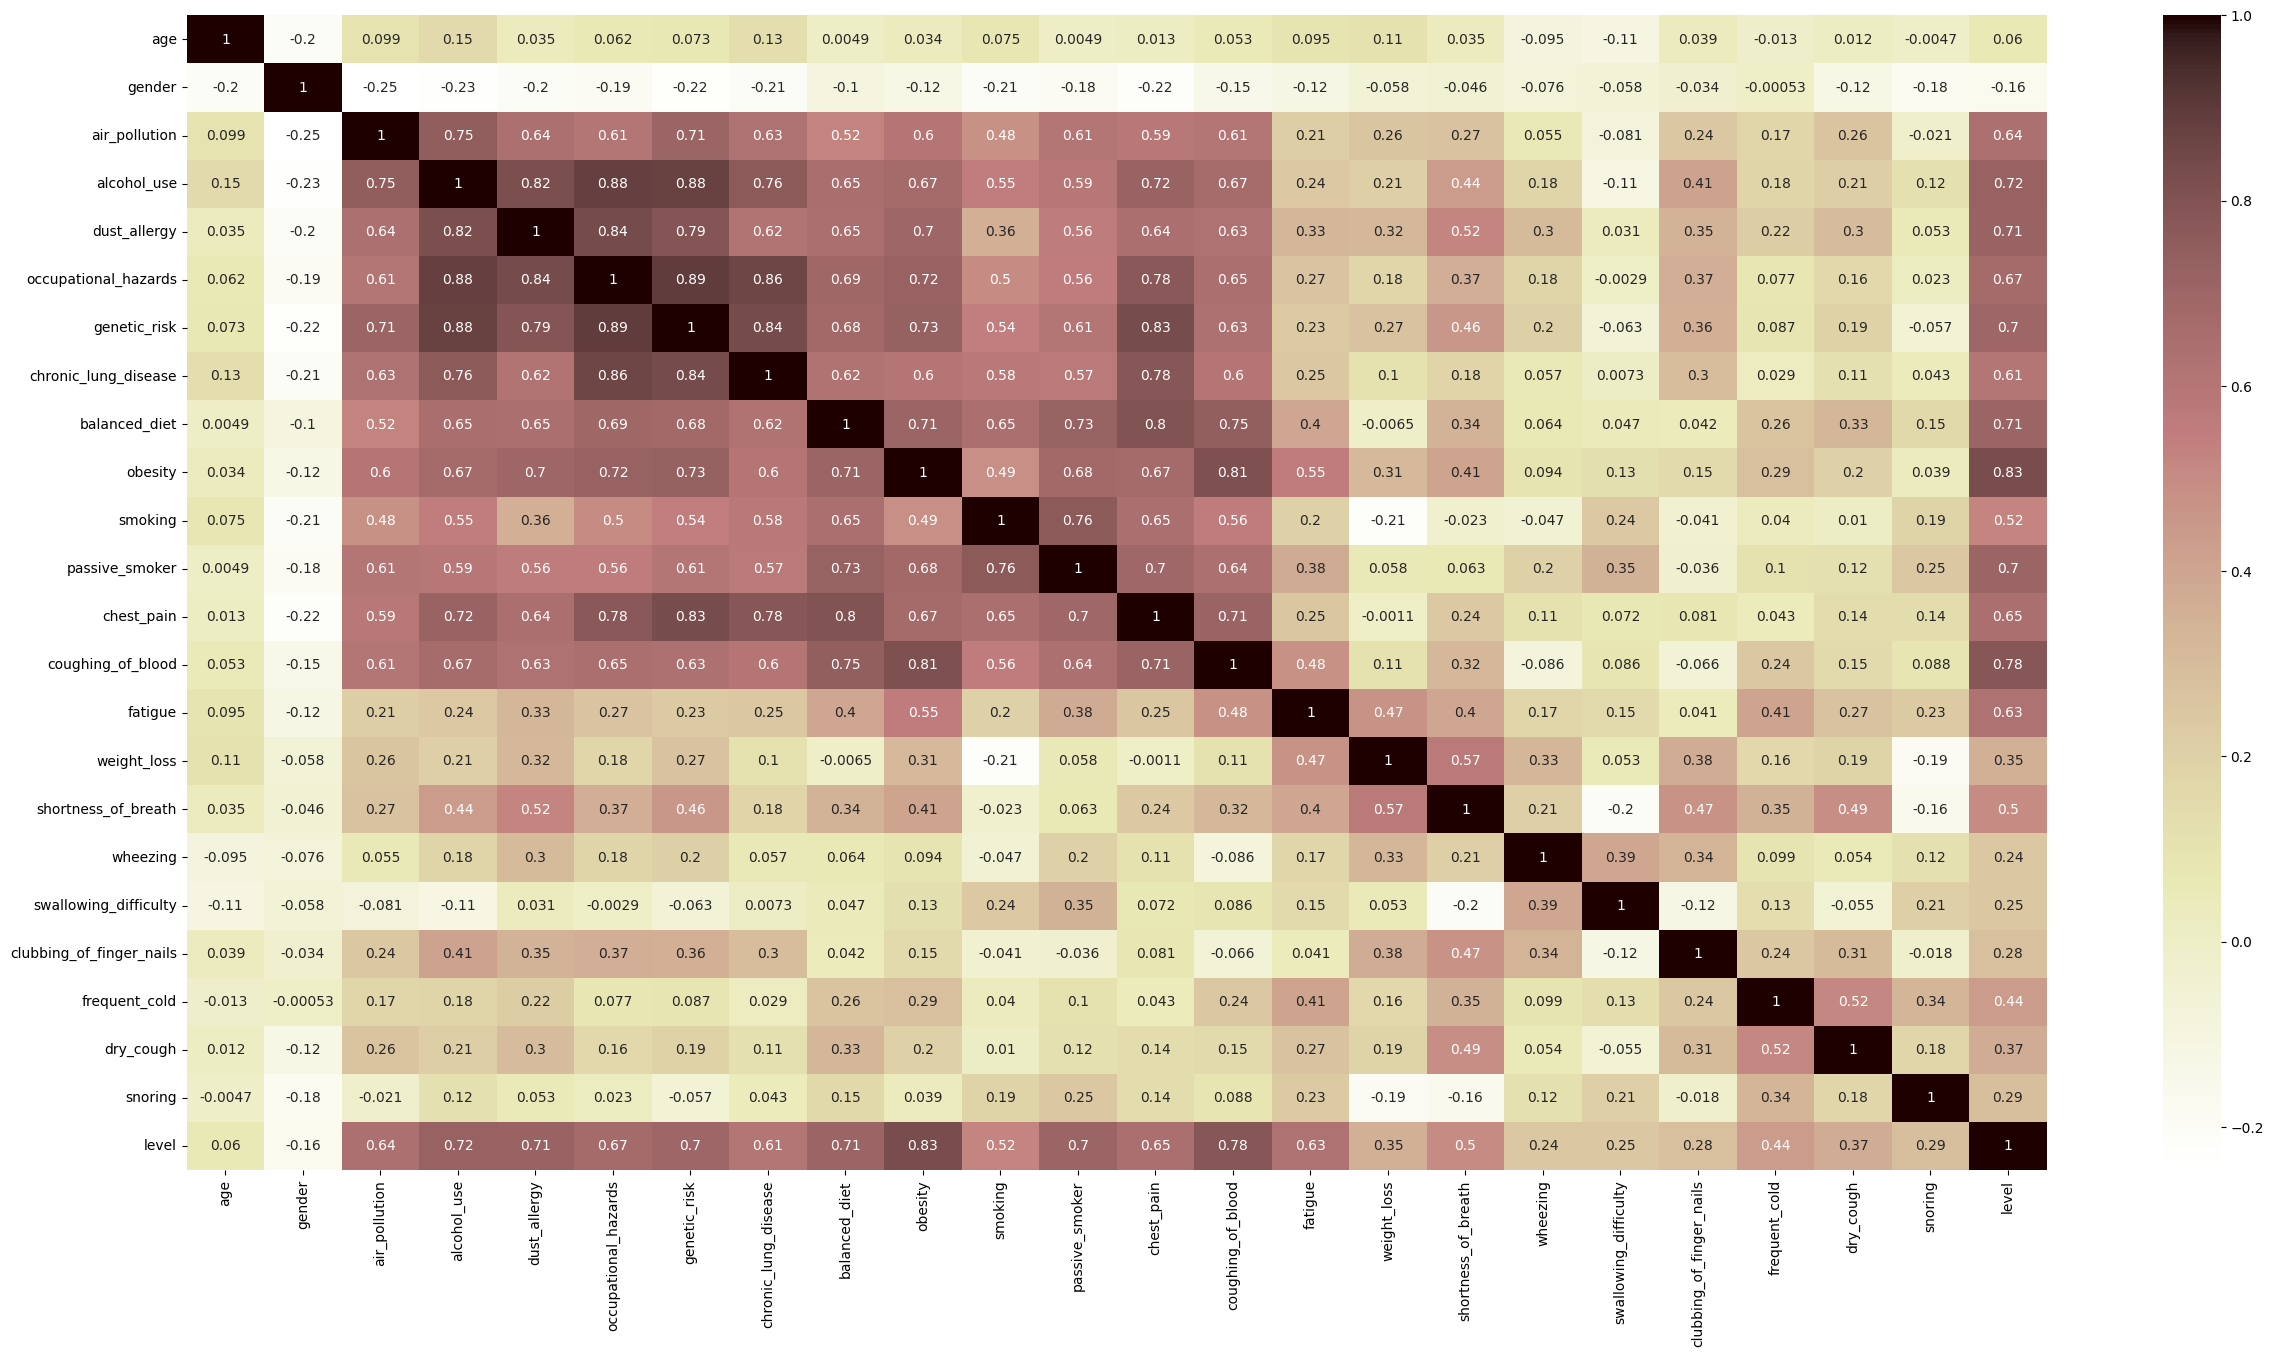

In [29]:
# Mapa de calor do df
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.pink_r)
plt.show()

<ipython-input-30-c01512f5a703>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-30-c01512f5a703>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-30-c01512f5a703>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
<ipython-input-30-c01512f5a703>:6: FutureWarning: 

Passing `palette` without assigning `hu

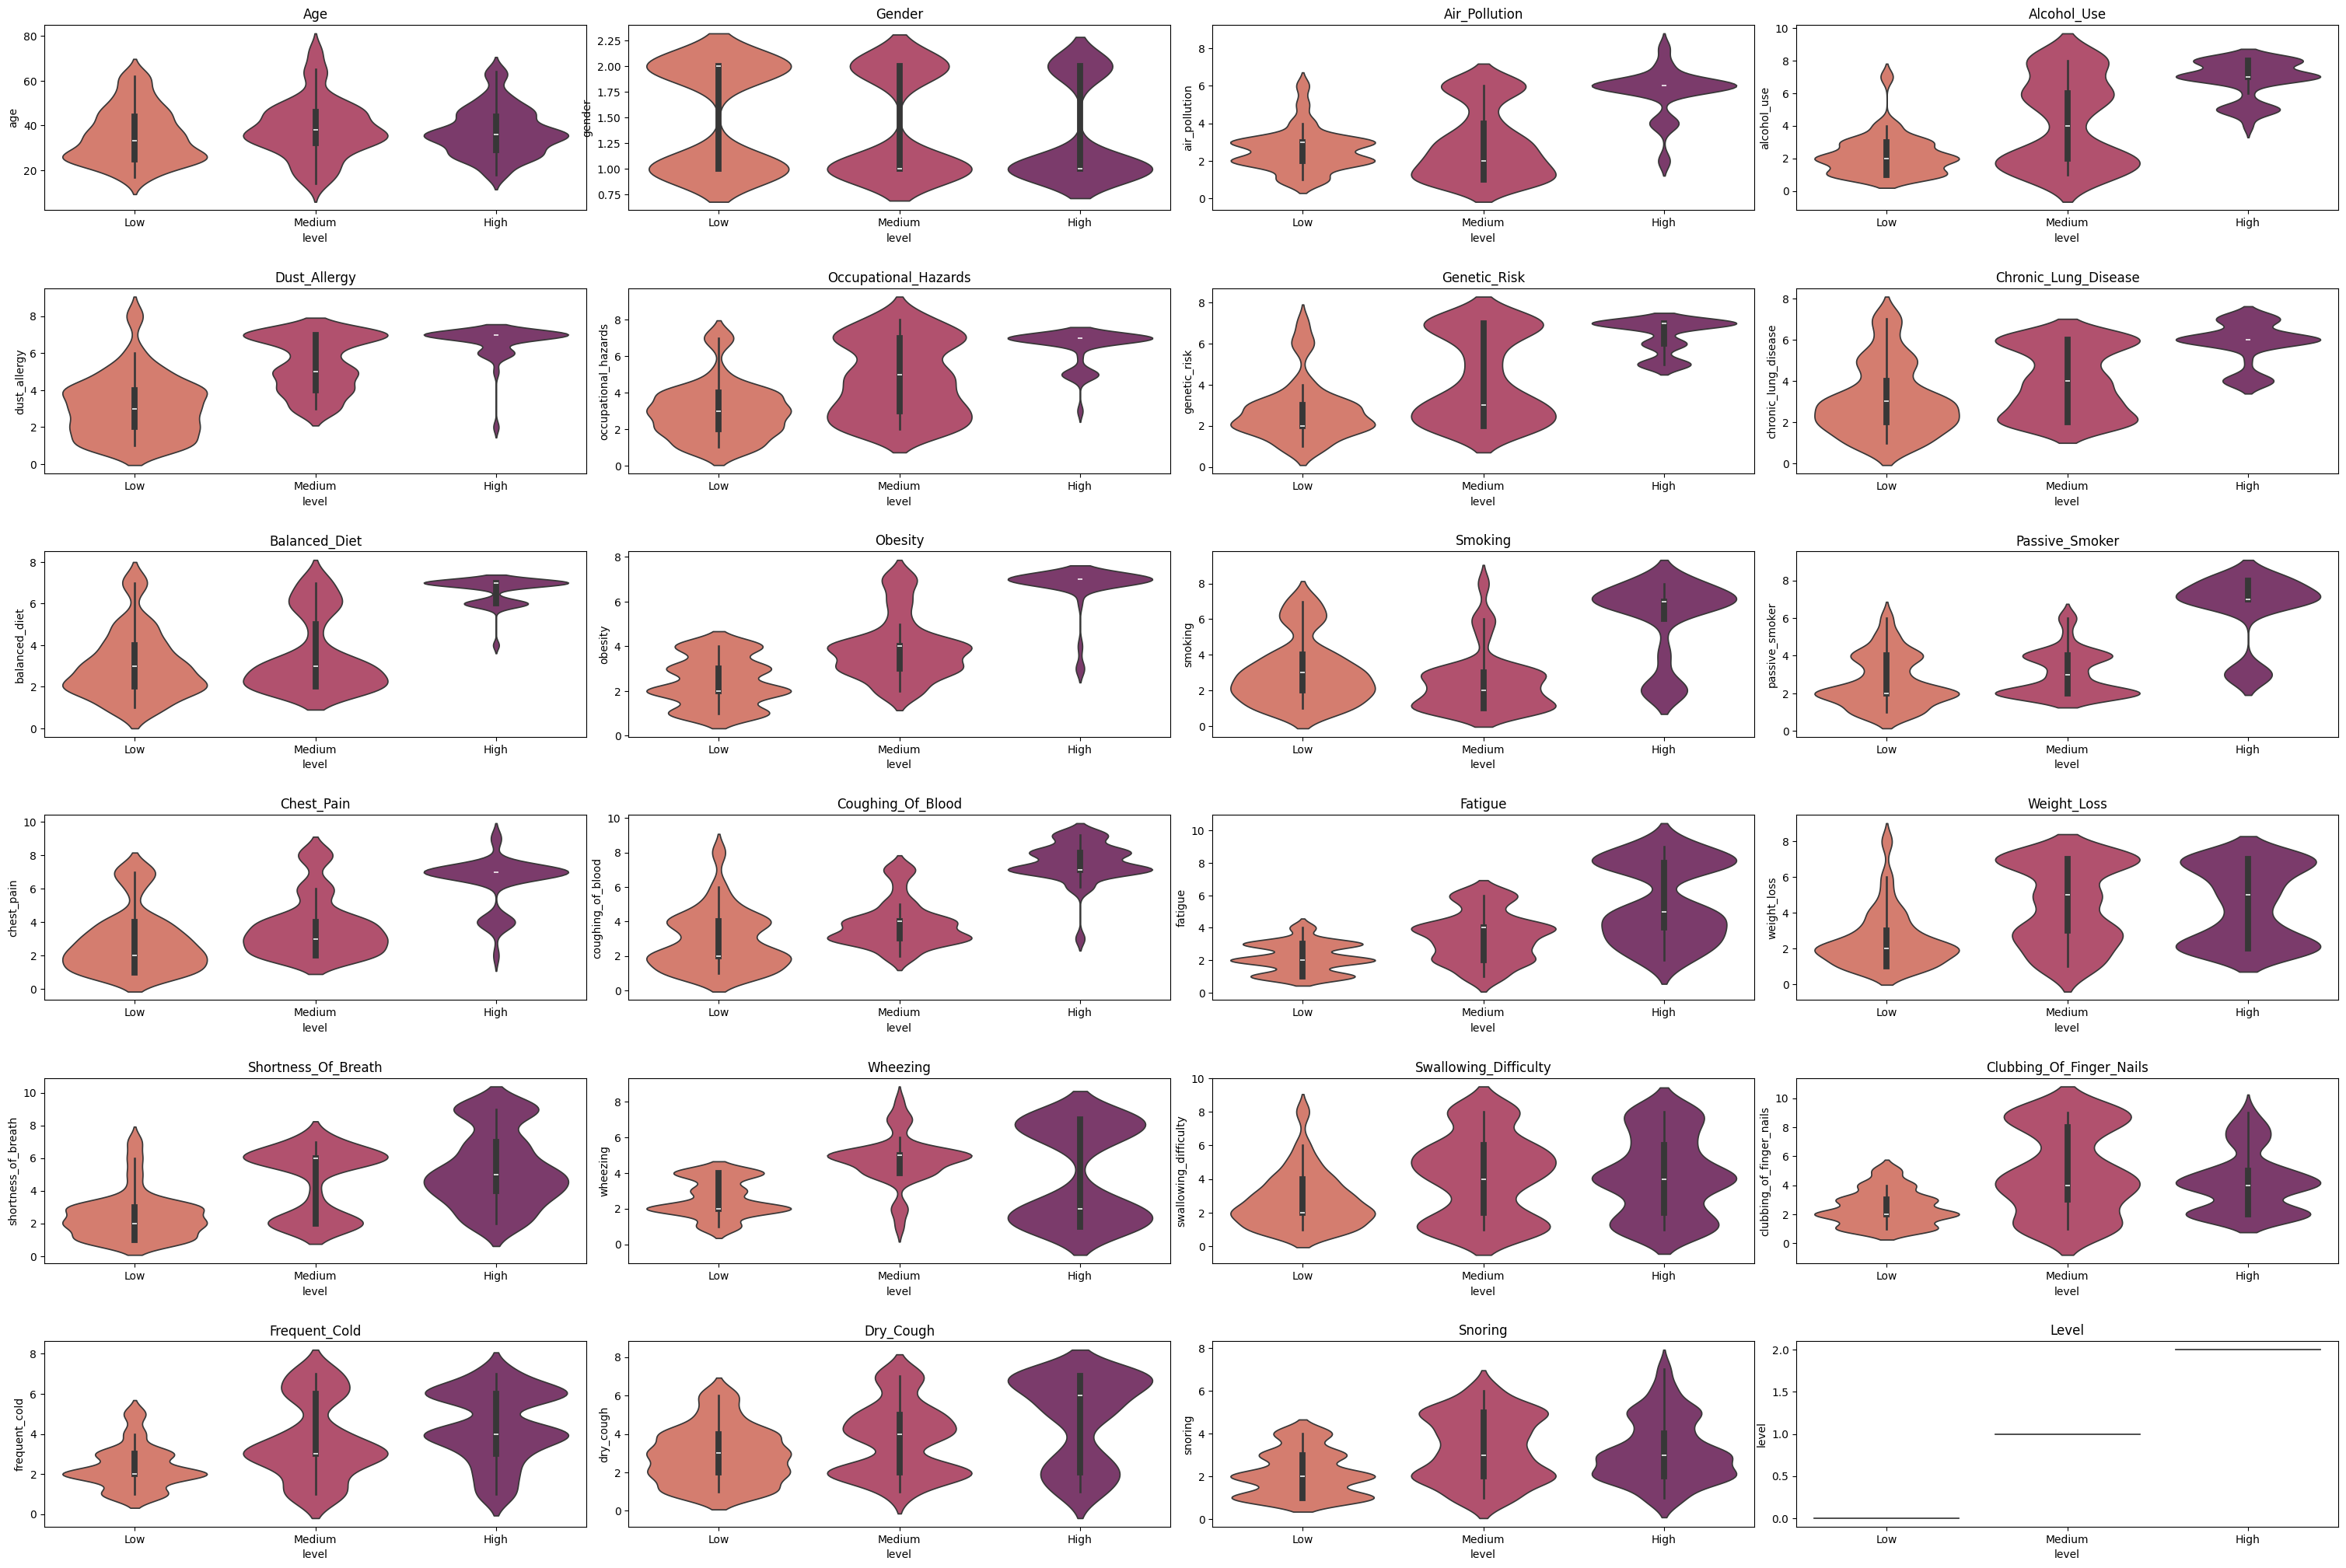

In [30]:
# ViolinPlot do nivel do cancer em relaçaõ a cada coluna
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(30, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=df, hue_order='level', palette='flare', ax=ax[i])
    ax[i].set_title(col.title())

plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

In [15]:
## Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# tamanho dos subconjuntos
print(f'X treino: {X_train.shape} e X teste {X_test.shape}')
print(f'Y treino: {y_train.shape} e Y teste {y_test.shape}')

# contagem dos diferentes valores presentes no conjunto de treinamento
print(f'\nContagem de outputs no conjunto de treinamento\n{y_train.value_counts()}')

X treino: (700, 23) e X teste (300, 23)
Y treino: (700,) e Y teste (300,)

Contagem de outputs no conjunto de treinamento
level
2    248
1    233
0    219
Name: count, dtype: int64


In [16]:
## Regressão logística multinomial
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

# fitting
MR.fit(X_train, y_train)

# predição com o modelo
MR_pred = MR.predict(X_test)

# coeficientes do modelo
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 35.92122045  -1.3038405  -34.61737995]
Coefficients: 
 [[-0.03465387  0.08270798 -0.14285985 -0.40864424 -0.27459842  0.04291256
  -0.45883523 -0.21030117 -0.02437107 -1.01380249 -0.02112866 -0.91624913
   0.30313698 -0.8306652  -0.74620644  0.04855736 -0.23207077 -0.90183
  -0.79610389 -0.76118075 -0.63440155 -0.51590854 -0.69398579]
 [ 0.04445193 -0.13335865 -0.34401463 -0.20597404  0.44531545 -0.01810438
   0.24411067 -0.12785733 -0.29528989  0.52122755 -0.06602335  0.10629869
  -0.33979896  0.00214847 -0.0944619  -0.39755293 -0.24094606  0.73361733
  -0.05145387  0.3552864   0.22668879  0.13411476  0.42253696]
 [-0.00979806  0.05065067  0.48687448  0.61461828 -0.17071703 -0.02480818
   0.21472456  0.3381585   0.31966096  0.49257494  0.08715201  0.80995045
   0.03666198  0.82851673  0.84066833  0.34899557  0.47301683  0.16821267
   0.84755776  0.40589435  0.40771276  0.38179379  0.27144883]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [27]:
## Matriz de confusão do modelo multinomial

def CM(y_test, y_pred_test, col_names, title='', cmap=plt.cm.pink_r):

    # matriz
    CM = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(9,7))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f", cmap=cmap, linewidths=5)

    tick_marks = np.arange(len(col_names))
    plt.xticks(tick_marks + 0.5, col_names)
    plt.yticks(tick_marks + 0.5, col_names, rotation=0)
    plt.xlabel('Label prevista')
    plt.ylabel('Label Verdadeira')
    plt.title('Matriz de Confusão ' + title)
    plt.show()

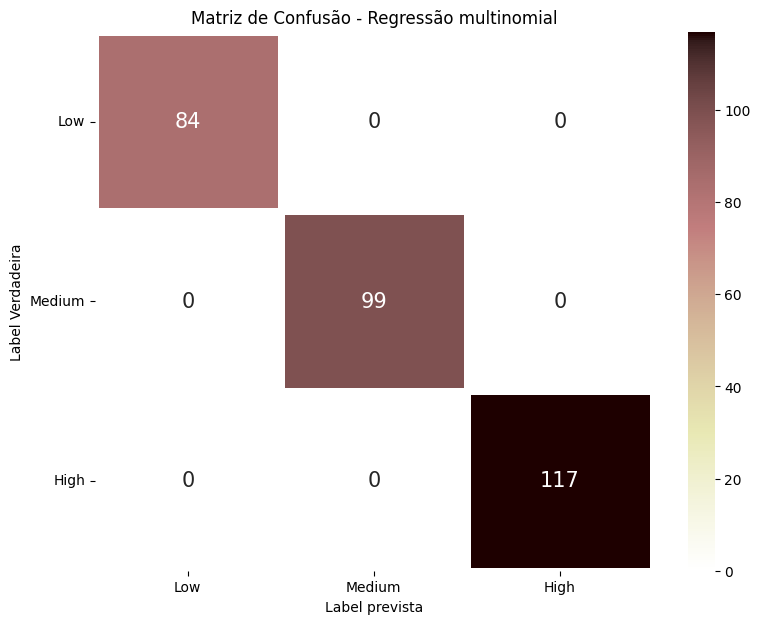

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [28]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Regressão multinomial')

ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))

In [34]:
 # Random Forest / Floresta aleatória
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    scores = []

    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    plt.plot(n_list, scores)
    plt.xlabel('Valor de n_estimators para Random Forest ')
    plt.ylabel('Precisão de teste')
    plt.grid(alpha=0.1)
    plt.show()


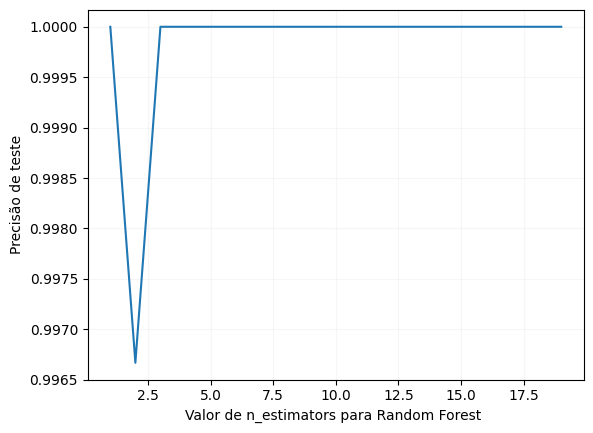

In [35]:
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

In [36]:
# Definindo modelo
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting
RF.fit(X_train, y_train)

# predição com modelo
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

,count
2,117
1,99
0,84


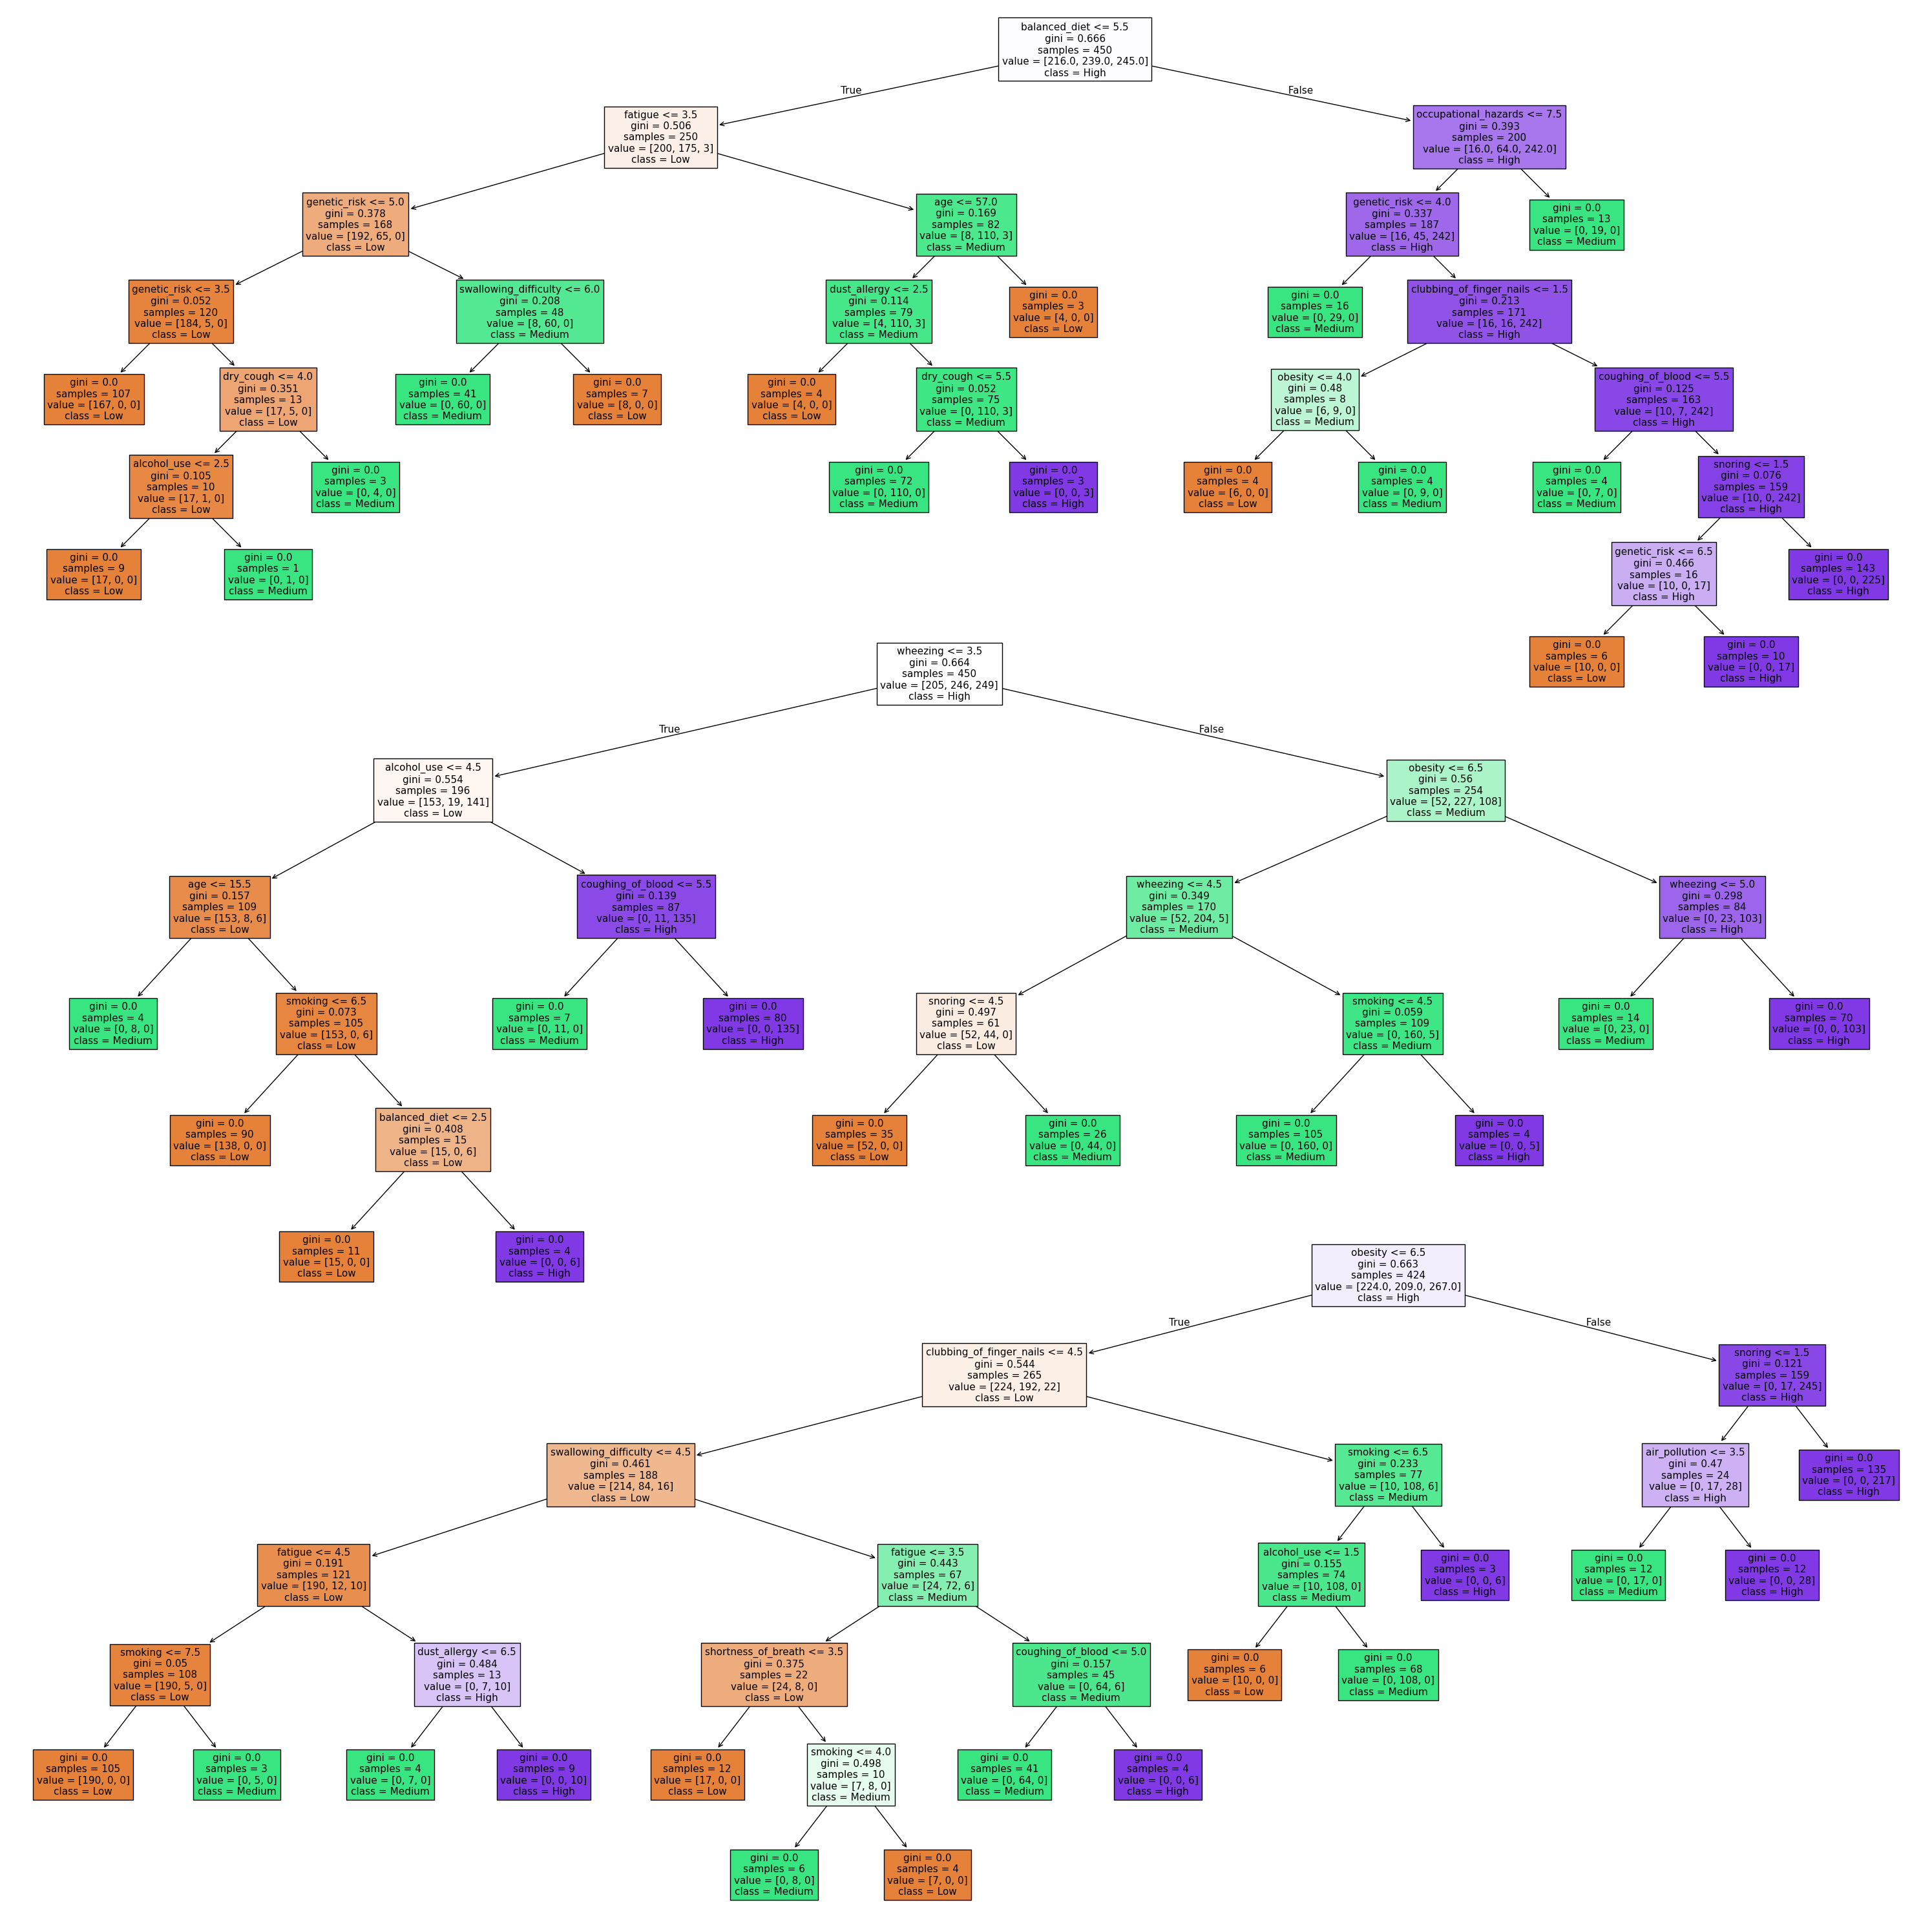

In [37]:
## Gráfico - Random Forest
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=X.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)

plt.tight_layout(h_pad=-10)
plt.show()

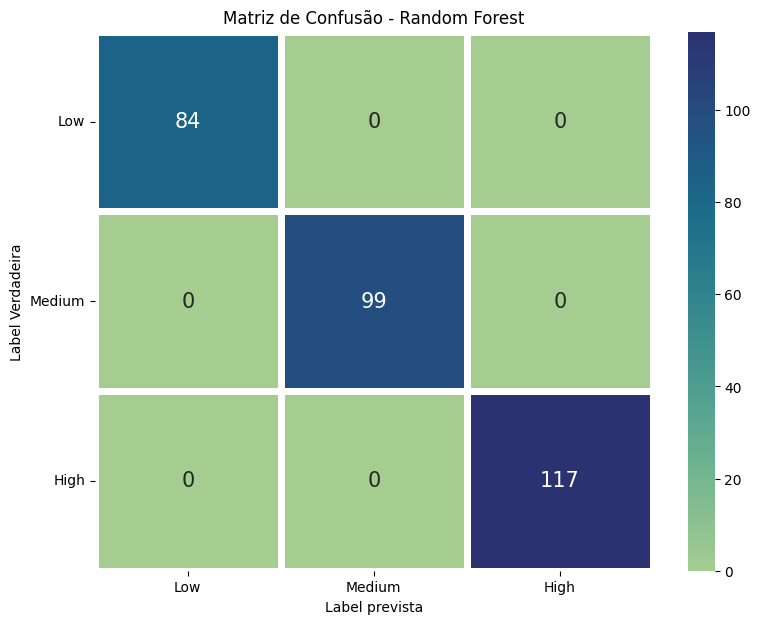

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [41]:
# Matriz de confusão -  Random Forest
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'], title='- Random Forest', cmap='crest')

ml_accuracies['Random Forest'] = accuracy_score(y_test, RF_pred)
print(classification_report(y_test, RF_pred))

In [44]:
#  Gaussian Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predições usando Naive Bayes
nb_pred = nb_model.predict(X_test)

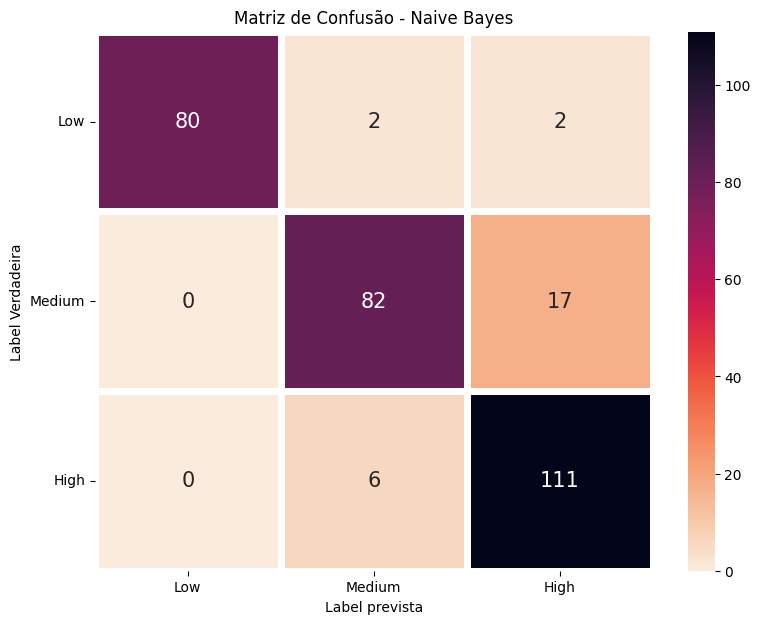

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [45]:
# Matriz de confusão de Naive Bayes

CM(y_test, nb_pred, col_names=['Low', 'Medium', 'High'], title='- Naive Bayes', cmap='rocket_r')

ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print(classification_report(y_test, nb_pred))

In [47]:
#  K-Nearest Neighbors (KNN)

knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_model.fit(X_train, y_train)

# Predições usando KNN
knn_pred = knn_model.predict(X_test)

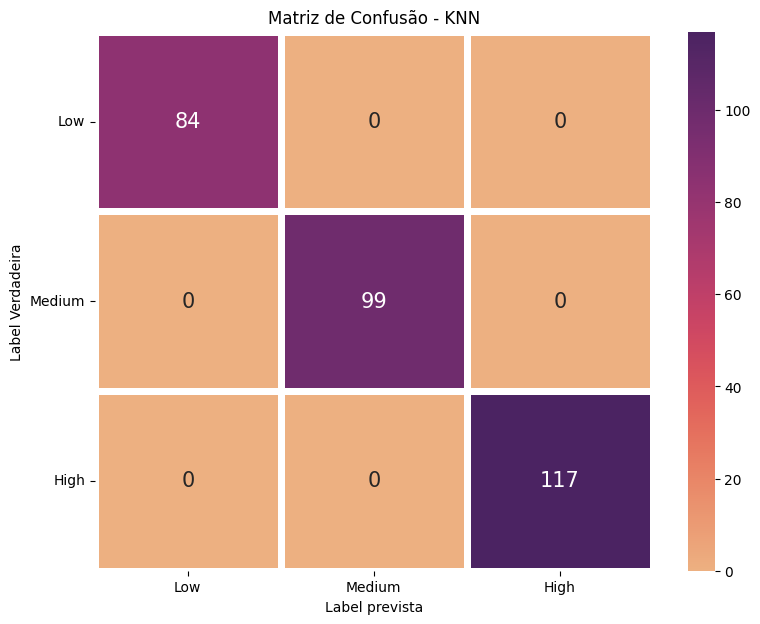

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [51]:
## Matriz de confusão de KNN

CM(y_test, knn_pred, col_names=['Low', 'Medium', 'High'], title='- KNN', cmap='flare')

ml_accuracies['KNN'] = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

In [52]:
# Support Vector Machines SVM
# Treino SVM
svm_model = SVC(C=0.5, kernel='linear')
svm_model.fit(X_train, y_train)

# Predições usando SVM
svm_pred = svm_model.predict(X_test)

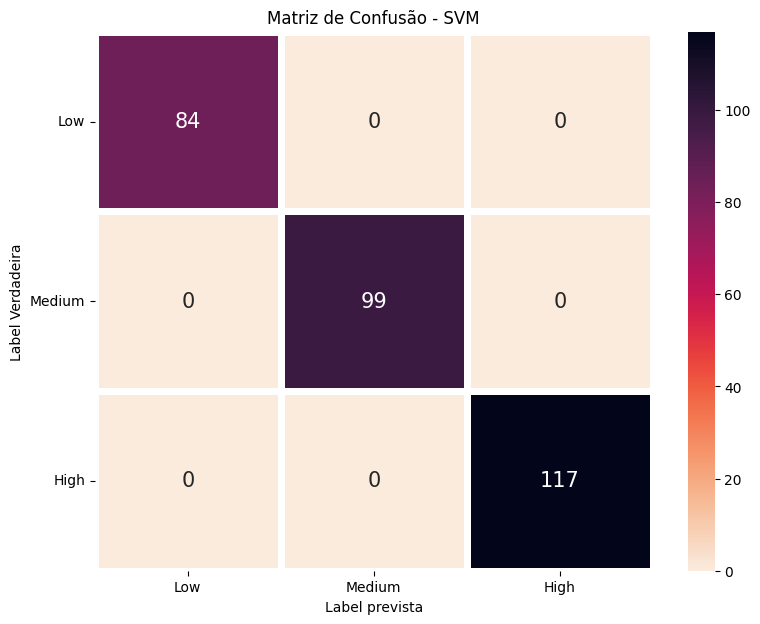

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [53]:
CM(y_test, svm_pred, col_names=['Low', 'Medium', 'High'], title='- SVM', cmap='rocket_r')

ml_accuracies['SVM'] = accuracy_score(y_test, svm_pred)
print(classification_report(y_test, svm_pred))

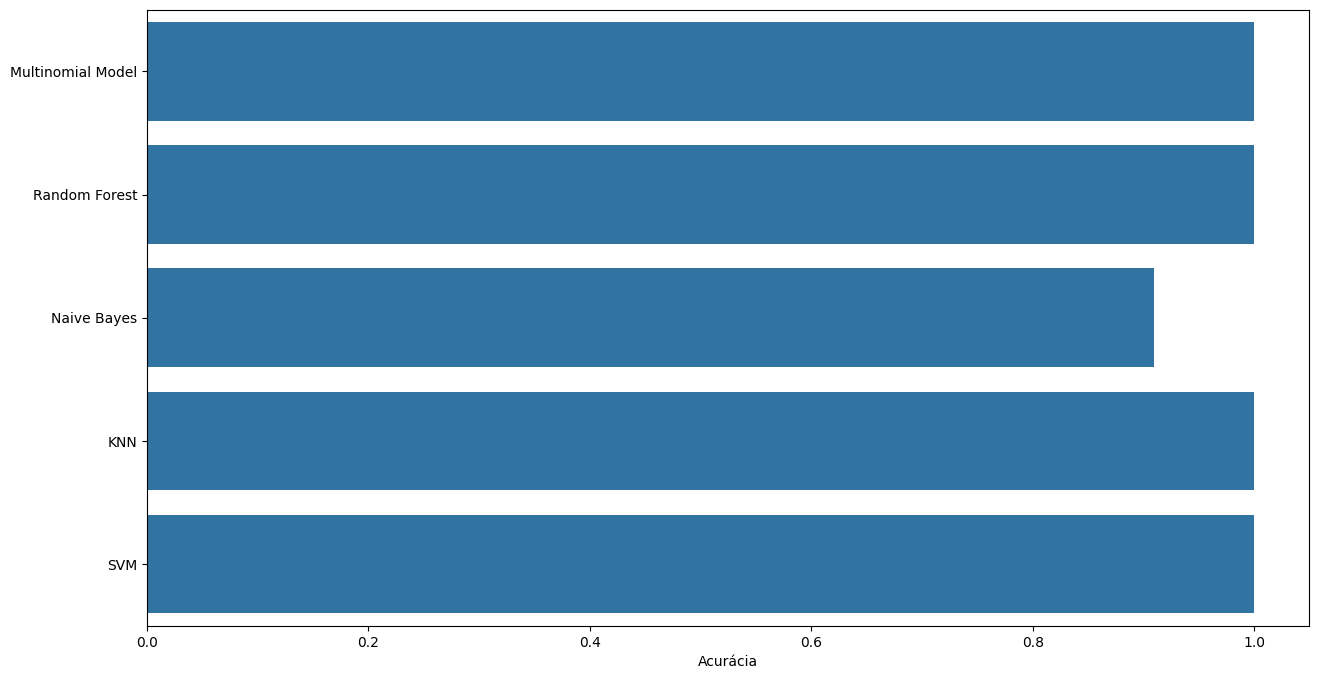

In [55]:
# Acurácia de cada modelo
plt.figure(figsize=(15, 8))
sns.barplot(
    x=list(ml_accuracies.values()),
    y=list(ml_accuracies.keys()),
)
plt.xlabel('Acurácia')
plt.show()